In [7]:
#!pip install pandas_datareader
#!pip install tensorflow
#!pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
import requests
import tensorflow as tf
import yfinance as yf

####  The Tata Power Company Limited

In [8]:
### Data Collection  
ticker=["TATAPOWER.NS"]
df=yf.download(tickers=ticker,period="max",actions=True,group_by="ticker")

[*********************100%***********************]  1 of 1 completed


In [9]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1996-01-01 00:00:00+05:30,11.580205,11.662232,11.488529,11.628456,5.920809,33160,0.0,0.0
1996-01-02 00:00:00+05:30,11.628456,11.739433,11.396852,11.483704,5.847106,176162,0.0,0.0
1996-01-03 00:00:00+05:30,11.483704,11.599506,11.392027,11.411327,5.810255,104661,0.0,0.0
1996-01-04 00:00:00+05:30,11.411327,11.387202,11.155598,11.242449,5.724268,77718,0.0,0.0
1996-01-05 00:00:00+05:30,11.242449,11.483704,11.097697,11.464403,5.837279,113469,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-01-16 00:00:00+05:30,207.300003,208.250000,206.149994,206.949997,206.949997,4396161,0.0,0.0
2023-01-17 00:00:00+05:30,206.899994,208.500000,206.000000,207.699997,207.699997,5676087,0.0,0.0
2023-01-18 00:00:00+05:30,207.649994,208.350006,207.300003,207.500000,207.500000,4564618,0.0,0.0


In [17]:
# saving dataframe as csv :
df.to_csv('TATAPOWER.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6805 entries, 1996-01-01 00:00:00+05:30 to 2023-01-20 00:00:00+05:30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6805 non-null   float64
 1   High          6805 non-null   float64
 2   Low           6805 non-null   float64
 3   Close         6805 non-null   float64
 4   Adj Close     6805 non-null   float64
 5   Volume        6805 non-null   int64  
 6   Dividends     6805 non-null   float64
 7   Stock Splits  6805 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 478.5 KB


In [ ]:
Observation:-
    1. there are non null values
    2. Open, High ,Low, Close, Adj, Close, Dividends Stock Splits :- are float64
    3. Volume are in int64

In [14]:
df1=df.reset_index()['Close']

In [15]:
df1

0        11.628456
1        11.483704
2        11.411327
3        11.242449
4        11.464403
           ...    
6800    206.949997
6801    207.699997
6802    207.500000
6803    205.300003
6804    207.199997
Name: Close, Length: 6805, dtype: float64

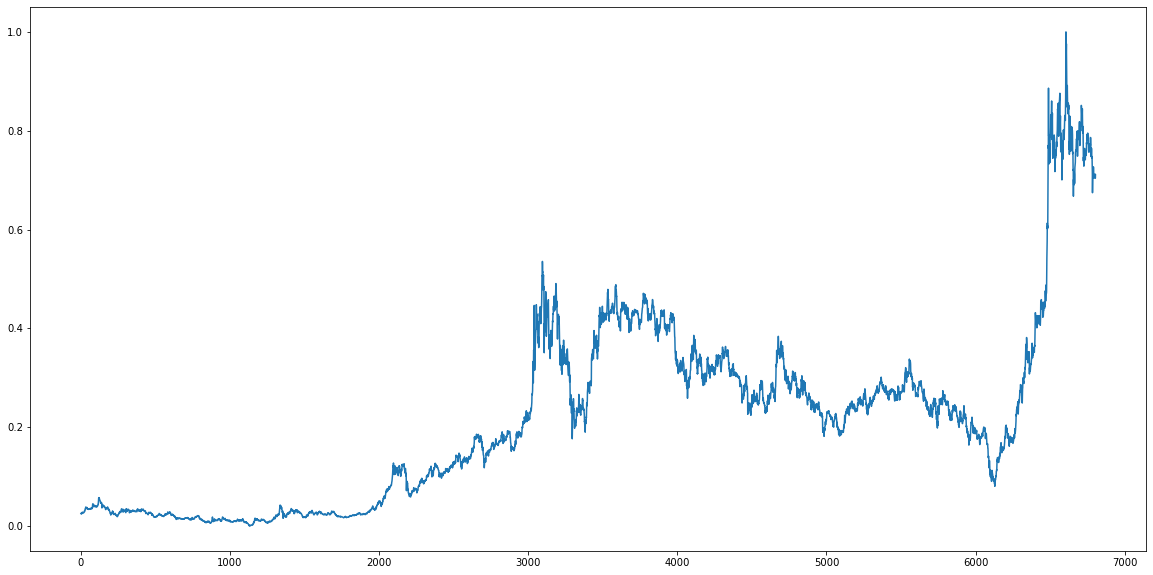

In [161]:
plt.figure(figsize=(20, 10))
plt.plot(df1)

In [19]:
### Stock Splits
df["Stock Splits"].value_counts()

0.0     6804
10.0       1
Name: Stock Splits, dtype: int64

In [20]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler :
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
df1 
# df1 id now converted into array and values is betweed 0 - 1

array([[0.02562235],
       [0.02511531],
       [0.02486179],
       ...,
       [0.71172007],
       [0.70401394],
       [0.71066922]])

In [25]:
##splitting dataset into train and test split
training_size = int(len(df1)*0.65)   # we take 65% data in Training
test_size = len(df1)-training_size   # 35% will be in Test data
training_size,test_size

(4423, 2382)

In [26]:
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]
                     #0 to 4423 rows in train data  # 4423 to 6804 rows in test data

In [28]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [29]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
X_train

array([[0.02562235, 0.02511531, 0.02486179, ..., 0.04057998, 0.04137434,
        0.04044477],
       [0.02511531, 0.02486179, 0.02427024, ..., 0.04137434, 0.04044477,
        0.03934619],
       [0.02486179, 0.02427024, 0.0250477 , ..., 0.04044477, 0.03934619,
        0.03868704],
       ...,
       [0.35198613, 0.35418329, 0.35790156, ..., 0.30077524, 0.29807102,
        0.29198656],
       [0.35418329, 0.35790156, 0.36145085, ..., 0.29807102, 0.29198656,
        0.28235283],
       [0.35790156, 0.36145085, 0.363479  , ..., 0.29198656, 0.28235283,
        0.29418374]])

In [31]:
print(X_train.shape), print(y_train.shape)

(4322, 100)
(4322,)


(None, None)

In [32]:
print(X_test.shape), print(ytest.shape)

(2281, 100)
(2281,)


(None, None)

In [33]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [35]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [36]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
68/68 [==============================] - 27s 301ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 2/100
68/68 [==============================] - 14s 212ms/step - loss: 2.6265e-04 - val_loss: 0.0014
Epoch 3/100
68/68 [==============================] - 18s 257ms/step - loss: 2.4426e-04 - val_loss: 0.0016
Epoch 4/100
68/68 [==============================] - 16s 243ms/step - loss: 2.2897e-04 - val_loss: 0.0015
Epoch 5/100
68/68 [==============================] - 13s 197ms/step - loss: 2.2923e-04 - val_loss: 0.0012
Epoch 6/100
68/68 [==============================] - 14s 211ms/step - loss: 2.1875e-04 - val_loss: 0.0011
Epoch 7/100
68/68 [==============================] - 18s 267ms/step - loss: 2.1619e-04 - val_loss: 8.2660e-04
Epoch 8/100
68/68 [==============================] - 22s 319ms/step - loss: 2.1894e-04 - val_loss: 0.0012
Epoch 9/100
68/68 [==============================] - 19s 272ms/step - loss: 1.8953e-04 - val_loss: 0.0014
Epoch 10/100
68/68 [==========================

In [39]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

72/72 [==============================] - 5s 66ms/step


In [41]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

19079.33913668973

In [43]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

31244.901905979066

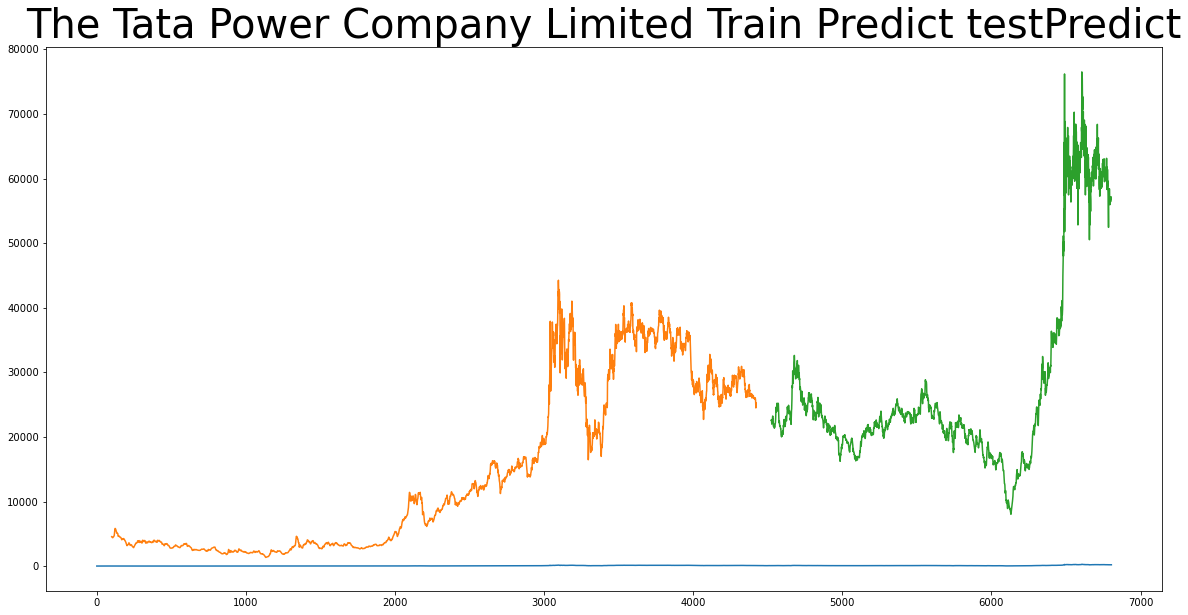

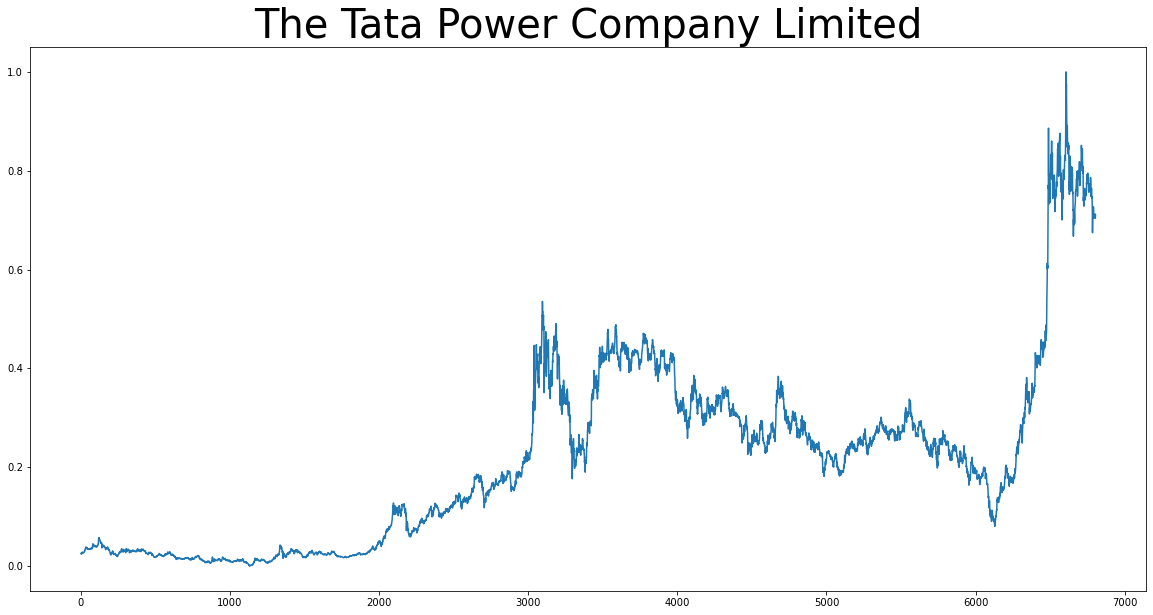

In [160]:
### Plotting 
# shift train predictions for plotting

look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(20, 10))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("The Tata Power Company Limited Train Predict testPredict",fontsize=40)
plt.show()
plt.figure(figsize=(20, 10))
plt.title("The Tata Power Company Limited",fontsize=40)
plt.plot(df1)
plt.show()

In [97]:
len(test_data)

2382

In [98]:
x_input=test_data[2282:].reshape(1,-1)
x_input.shape

(1, 100)

In [99]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [100]:
temp_input

[0.8148773535866911,
 0.8157530521604014,
 0.8087474635707194,
 0.8131259564392707,
 0.8513064463220774,
 0.8499052965351014,
 0.8427245575409975,
 0.8337924748478722,
 0.8353687215908708,
 0.8292388315748991,
 0.8308150783178977,
 0.844475954688418,
 0.8126005586744042,
 0.798764531899462,
 0.8089226139751412,
 0.7947362863913552,
 0.7963125331343538,
 0.7712675753056002,
 0.7390418784827426,
 0.746748015241713,
 0.7341379344009256,
 0.7283583451937976,
 0.743245220946872,
 0.7315108386797948,
 0.7521773570883964,
 0.7614597405903655,
 0.7642619867159182,
 0.7567310003613696,
 0.7455220158591589,
 0.7483242619847116,
 0.7420192215643179,
 0.7411435229906076,
 0.7483242619847116,
 0.7577817958911025,
 0.7499005087277102,
 0.7583072471043683,
 0.7506011103453978,
 0.7520022066839746,
 0.7577817958911025,
 0.7759963689829953,
 0.7731941228574426,
 0.7765217667478617,
 0.7926346418834902,
 0.7872053000368067,
 0.7814256573812794,
 0.7845782043156759,
 0.7875555473972512,
 0.79526173760462

In [185]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.74622262 0.74429607 0.74797401 0.73378769 0.71662396 0.67459043
 0.6964829  0.71242062 0.71434717 0.70594048 0.71242062 0.72695725
 0.72520585 0.71382177 0.71207037 0.70436418 0.70716643 0.70664103
 0.70594048 0.70541503 0.70804213 0.70979352 0.71242062 0.71172007
 0.70401394 0.71066922 0.68987858 0.64793211 0.6129902  0.58816046
 0.56979579 0.5549587  0.54271245 0.53272301 0.52460593 0.51789862
 0.51216656 0.50706416 0.50234693 0.49786007 0.49351919 0.48929289
 0.48518467 0.48121777 0.4774234  0.47383156 0.47046581 0.46733955
 0.46445563 0.46180785 0.45938152 0.45715749 0.45511216 0.45322147
 0.45146161 0.44981086 0.44825017 0.44676328 0.44533727 0.4439626
 0.44263184 0.44134027 0.44008479 0.43886361 0.43767563 0.43652043
 0.4353981  0.4343085  0.4332515  0.43222666 0.43123388 0.43027243
 0.42934182 0.42844114 0.42756954 0.42672631 0.42591044 0.42512113
 0.42435765 0.4236193  0.42290521 0.42221469 0.4215472  0.42090195
 0.42027834 0.41967583 0.41909367 0.41853148 0.4179

10 day output [[0.40977737]]
11 day input [0.72695725 0.72520585 0.71382177 0.71207037 0.70436418 0.70716643
 0.70664103 0.70594048 0.70541503 0.70804213 0.70979352 0.71242062
 0.71172007 0.70401394 0.71066922 0.68987858 0.64793211 0.6129902
 0.58816046 0.56979579 0.5549587  0.54271245 0.53272301 0.52460593
 0.51789862 0.51216656 0.50706416 0.50234693 0.49786007 0.49351919
 0.48929289 0.48518467 0.48121777 0.4774234  0.47383156 0.47046581
 0.46733955 0.46445563 0.46180785 0.45938152 0.45715749 0.45511216
 0.45322147 0.45146161 0.44981086 0.44825017 0.44676328 0.44533727
 0.4439626  0.44263184 0.44134027 0.44008479 0.43886361 0.43767563
 0.43652043 0.4353981  0.4343085  0.4332515  0.43222666 0.43123388
 0.43027243 0.42934182 0.42844114 0.42756954 0.42672631 0.42591044
 0.42512113 0.42435765 0.4236193  0.42290521 0.42221469 0.4215472
 0.42090195 0.42027834 0.41967583 0.41909367 0.41853148 0.41798845
 0.41746423 0.41695789 0.41646895 0.41599688 0.41554105 0.41510084
 0.4146758  0.41426539

 0.4086197  0.40840989 0.40820679 0.40801013]
19 day output [[0.40781975]]
20 day input [0.70804213 0.70979352 0.71242062 0.71172007 0.70401394 0.71066922
 0.68987858 0.64793211 0.6129902  0.58816046 0.56979579 0.5549587
 0.54271245 0.53272301 0.52460593 0.51789862 0.51216656 0.50706416
 0.50234693 0.49786007 0.49351919 0.48929289 0.48518467 0.48121777
 0.4774234  0.47383156 0.47046581 0.46733955 0.46445563 0.46180785
 0.45938152 0.45715749 0.45511216 0.45322147 0.45146161 0.44981086
 0.44825017 0.44676328 0.44533727 0.4439626  0.44263184 0.44134027
 0.44008479 0.43886361 0.43767563 0.43652043 0.4353981  0.4343085
 0.4332515  0.43222666 0.43123388 0.43027243 0.42934182 0.42844114
 0.42756954 0.42672631 0.42591044 0.42512113 0.42435765 0.4236193
 0.42290521 0.42221469 0.4215472  0.42090195 0.42027834 0.41967583
 0.41909367 0.41853148 0.41798845 0.41746423 0.41695789 0.41646895
 0.41599688 0.41554105 0.41510084 0.4146758  0.41426539 0.41386899
 0.41348588 0.41311583 0.41275832 0.41241279

29 day output [[0.4062152]]
[[0.41275832056999207], [0.4124127924442291], [0.41207900643348694], [0.4117562770843506], [0.41144439578056335], [0.41114288568496704], [0.4108510911464691], [0.41056913137435913], [0.4102964401245117], [0.4100326597690582], [0.40977737307548523], [0.4095304608345032], [0.40929144620895386], [0.40906018018722534], [0.4088362753391266], [0.4086197018623352], [0.40840989351272583], [0.4082067906856537], [0.4080101251602173], [0.4078197479248047], [0.40763527154922485], [0.40745672583580017], [0.407283753156662], [0.40711626410484314], [0.40695396065711975], [0.40679675340652466], [0.406644344329834], [0.40649664402008057], [0.4063537120819092], [0.40621519088745117]]


In [186]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [187]:
len(df1)

6805

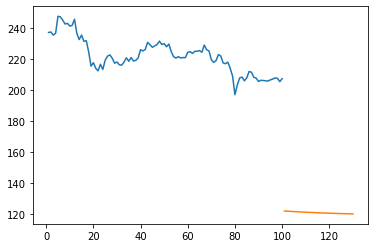

In [188]:
plt.plot(day_new,scaler.inverse_transform(df1[6705:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

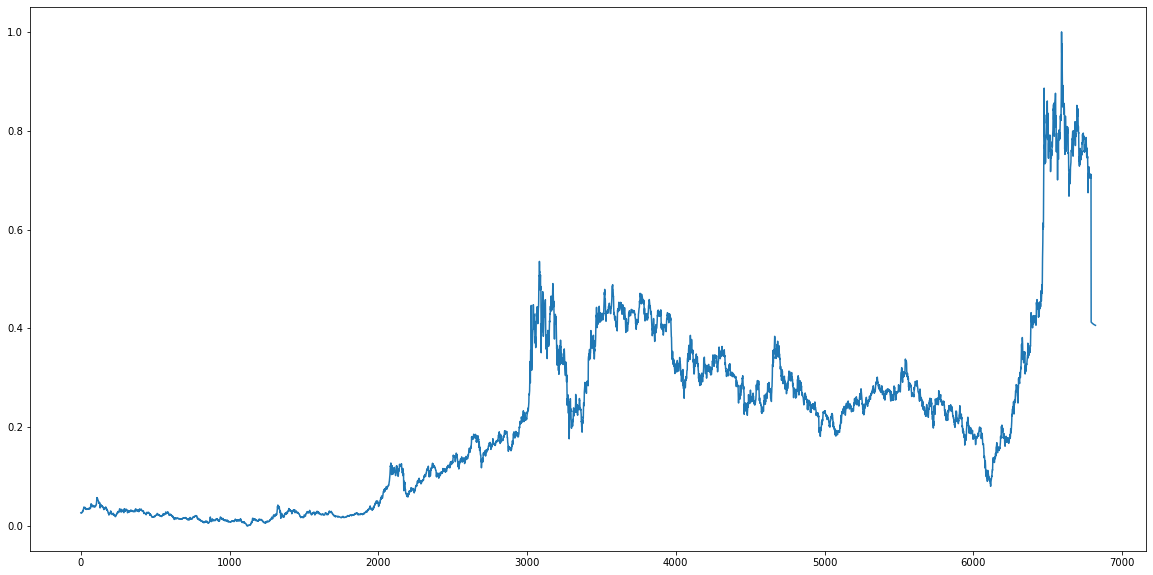

In [189]:
df3=df1.tolist()
df3.extend(lst_output)
plt.figure(figsize=(20, 10))
plt.plot(df3[12:])

In [190]:
df3=scaler.inverse_transform(df3).tolist()

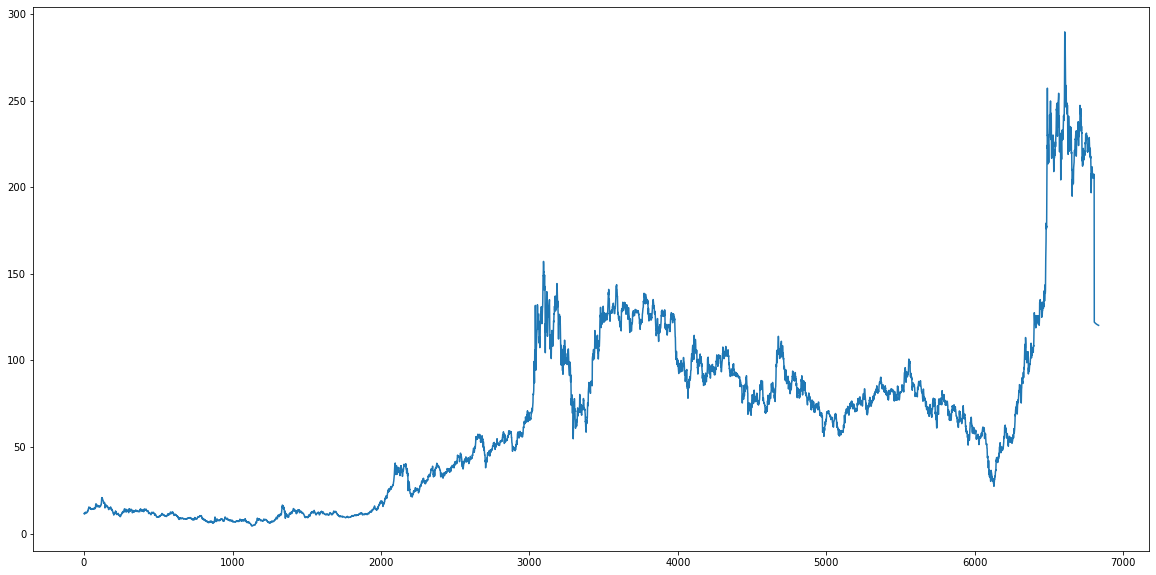

In [191]:
plt.figure(figsize=(20,10))
plt.plot(df3)